<a href="https://colab.research.google.com/github/ramonferrari/mpgc_ti/blob/main/BDADS_2S2023_Tarefa_Aulas_5_e_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarefa Aulas 5 e 6 – Exploração de Cluster Analysis e SNA em R
#### Grupo:
1.   Antonio Angelo dos Santos
2. Gabriel Menegon Cardozo
3. Gustavo Salomão
4. Lucas Felipe Ballesteros Martins
5. Ramon Moreno Ferrari
6. Valter Bellei



### Preparação: instala e carrega pacotes necessários

In [47]:
install.packages("network")
install.packages("sna")
install.packages("rgl")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [48]:
library(network)
library(sna)
library(rgl)

## Rede One Mode



In [49]:
# Endereço do arquivo na nuvem, para funcionar para todos os colegas
url_dataset <- c("https://raw.githubusercontent.com/ramonferrari/mpgc_ti/main/Rede%20One%20Mode_Tarefa%20Aulas%205%20e%206.csv")

In [50]:
# Leitura dos dados
rede <- read.table(url_dataset,header=TRUE,sep = ",")

In [51]:
# Dataset lido corretamente?
head(rede)
names(rede)

,Label,A,B,C,D,E,F,G,H,I,⋯,N,O,P,Q,R,S,T,U,V,W
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,A,0,1,1,1,1,0,0,0,0,⋯,1,1,1,0,0,1,0,1,1,1
2,B,1,0,1,1,0,0,0,0,0,⋯,0,1,1,1,0,0,0,0,1,1
3,C,1,1,0,1,0,0,0,0,0,⋯,1,0,1,1,0,0,0,0,0,1
4,D,1,1,1,0,1,0,0,0,0,⋯,1,1,0,0,0,1,0,0,0,0
5,E,1,0,0,1,0,1,1,1,1,⋯,0,0,1,1,0,0,0,0,0,0
6,F,0,0,0,0,1,0,1,0,0,⋯,0,0,0,1,0,0,0,0,0,0


[1] "Label" "A"     "B"     "C"     "D"     "E"     "F"     "G"     "H"    
[10] "I"     "J"     "K"     "L"     "M"     "N"     "O"     "P"     "Q"    
[19] "R"     "S"     "T"     "U"     "V"     "W"

In [52]:
# Adaptando o data.frame rede para que possa servir para a montagem da rede
grede <- rede[,2:24]
rownames(grede) <- rede[,1]
head(grede)
names(grede)

,A,B,C,D,E,F,G,H,I,J,⋯,N,O,P,Q,R,S,T,U,V,W
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
A,0,1,1,1,1,0,0,0,0,1,⋯,1,1,1,0,0,1,0,1,1,1
B,1,0,1,1,0,0,0,0,0,1,⋯,0,1,1,1,0,0,0,0,1,1
C,1,1,0,1,0,0,0,0,0,0,⋯,1,0,1,1,0,0,0,0,0,1
D,1,1,1,0,1,0,0,0,0,1,⋯,1,1,0,0,0,1,0,0,0,0
E,1,0,0,1,0,1,1,1,1,1,⋯,0,0,1,1,0,0,0,0,0,0
F,0,0,0,0,1,0,1,0,0,0,⋯,0,0,0,1,0,0,0,0,0,0


[1] "A" "B" "C" "D" "E" "F" "G" "H" "I" "J" "K" "L" "M" "N" "O" "P" "Q" "R" "S"
[20] "T" "U" "V" "W"

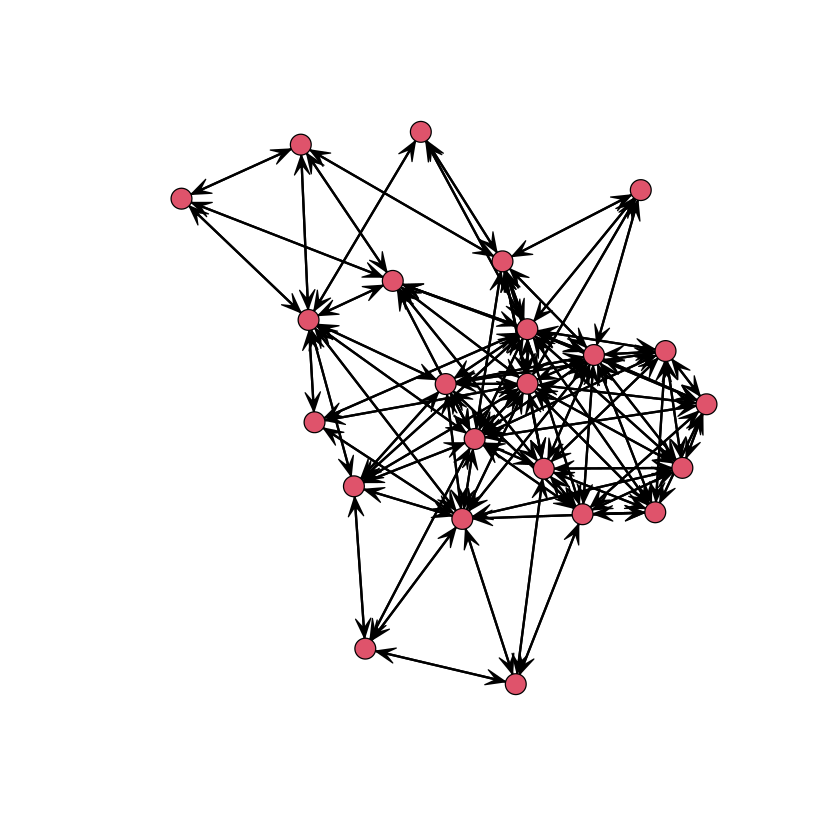

In [53]:
gplot(grede)

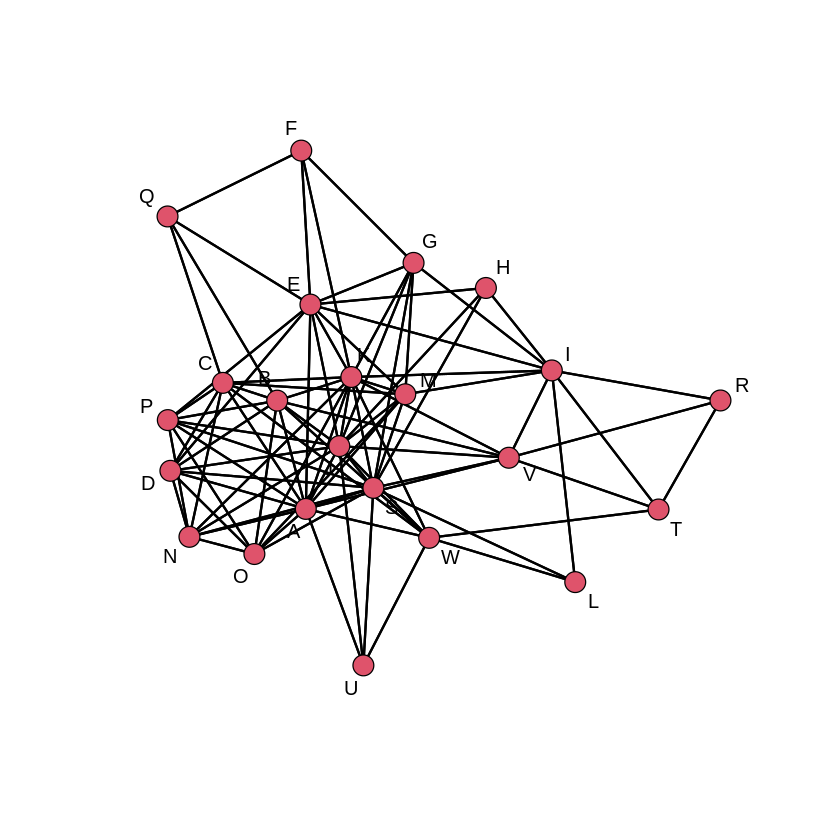

In [54]:
gplot(grede,gmode="graph",displaylabels = TRUE)

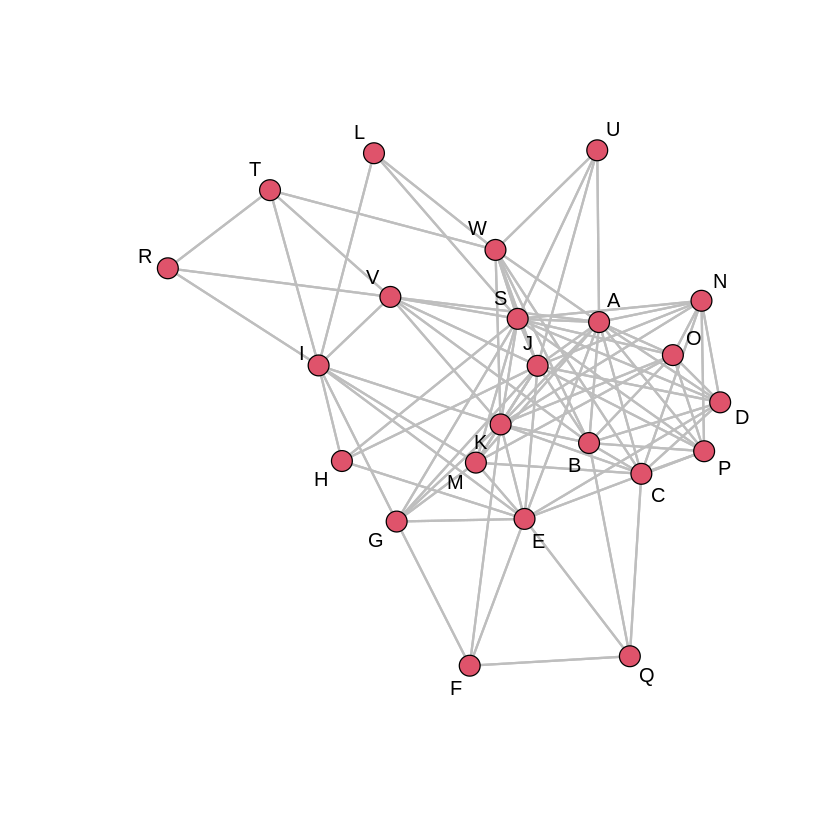

In [55]:
gplot(grede,gmode="graph",displaylabels = TRUE,edge.col="gray",usearrows=FALSE)

In [56]:
# Explorando a rede
print("|-------------------------------------")
print("Degree")
degree(grede,gmode="graph",cmode="indegree")
print("|-------------------------------------")
print("Closeness")
closeness(grede,gmode="graph")
print("|-------------------------------------")
print("Betweenness")
betweenness(grede,gmode="graph")

[1] "|-------------------------------------"
[1] "Degree"


[1] 14 10  9  8 11  4  7  4  9 14 14  3  9  8  8  8  4  3 14  4  4  8  9

[1] "|-------------------------------------"
[1] "Closeness"


[1] 0.7333333 0.6470588 0.5945946 0.5789474 0.6666667 0.5000000 0.5945946
 [8] 0.5365854 0.6111111 0.7333333 0.7333333 0.5116279 0.6285714 0.5789474
[15] 0.5789474 0.5789474 0.4888889 0.4489796 0.7096774 0.4782609 0.5000000
[22] 0.6111111 0.6285714

[1] "|-------------------------------------"
[1] "Betweenness"


[1] 12.9431040 10.3765735  6.7169048  1.9123395 18.5135137  0.8300000
 [7]  3.1769298  0.6035965 20.2369565 17.3055203 21.6396775  0.6052632
[13]  4.4891887  1.0376708  1.3828571  1.9123395  1.3768116  0.0000000
[19] 23.8868040  1.9692982  0.0000000 15.3562281 14.7284227

In [57]:
par(mfrow=c(3,2))

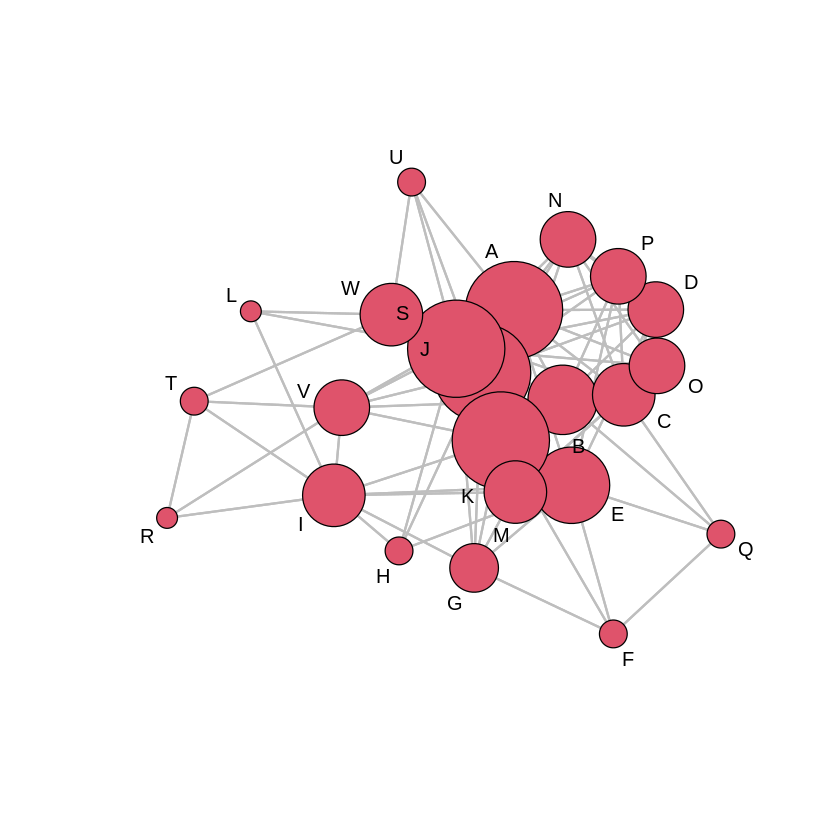

In [58]:
# Aprimorando a representação da rede
gplot(grede,gmode="grede",displaylabels = TRUE,
      edge.col="gray",usearrows=FALSE,vertex.cex=degree(grede,gmode="graph",cmode="indegree")/3)


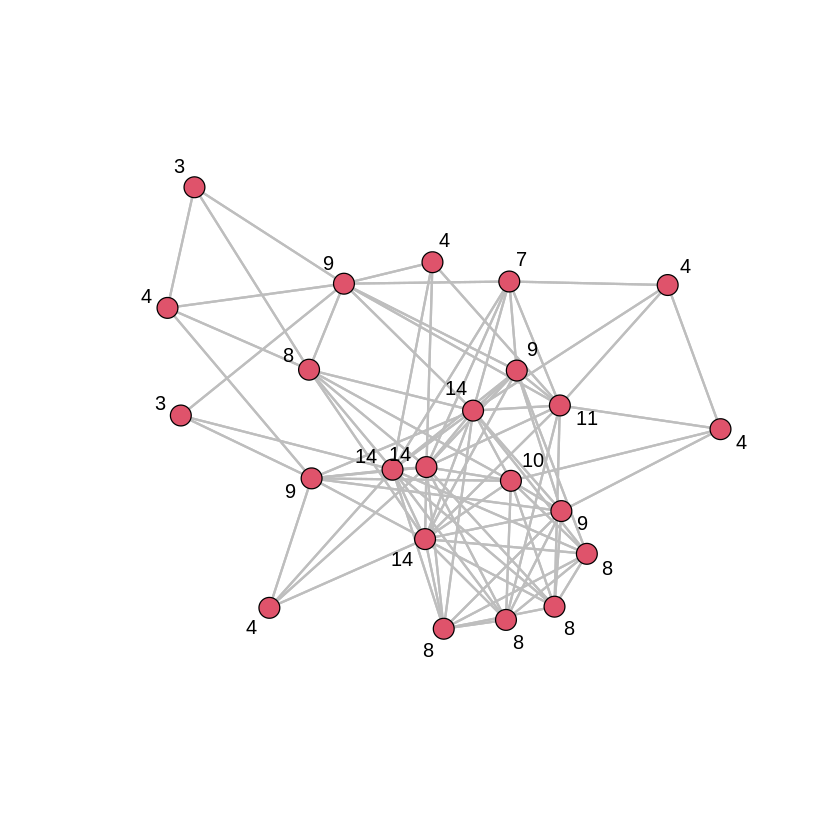

In [59]:
# Aprimorando a representação da rede
gplot(grede,gmode="grede",displaylabels = TRUE,
      edge.col="gray",usearrows=FALSE,label=degree(grede,gmode="graph",cmode="indegree"))

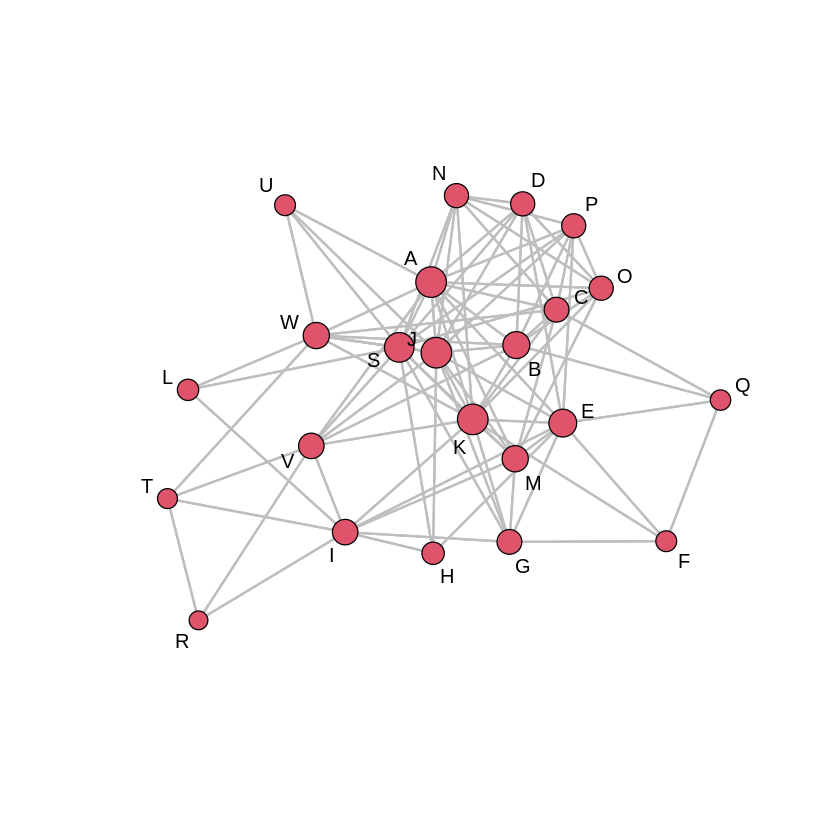

In [60]:
# Aprimorando a representação da rede

gplot(grede,gmode="grede",displaylabels = TRUE,
      edge.col="gray",usearrows=FALSE,vertex.cex=closeness(grede,gmode="graph")*2)


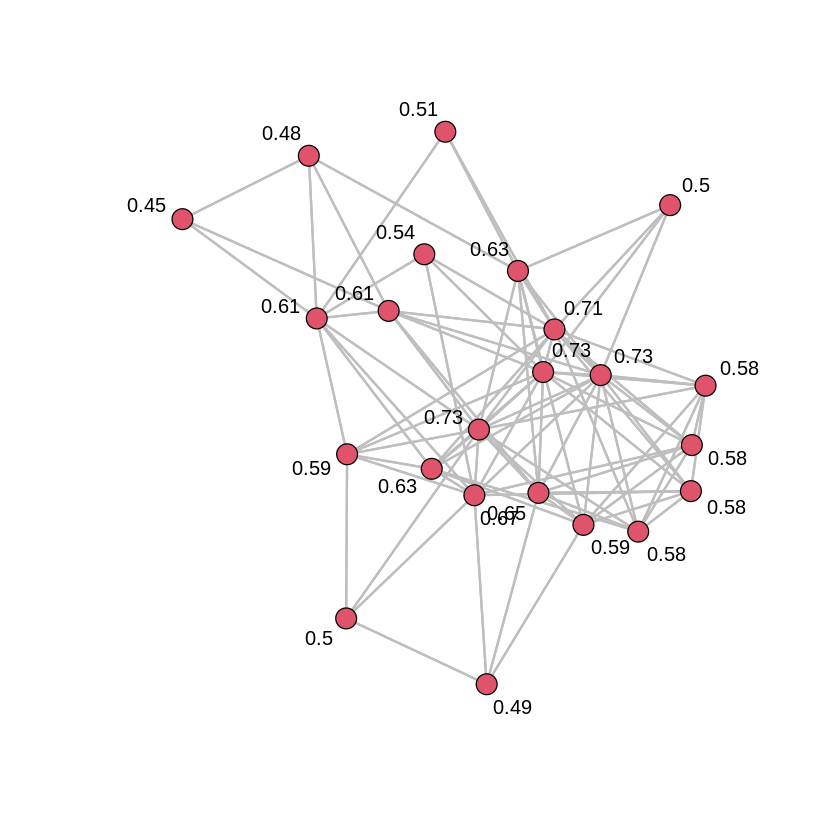

In [61]:
# Aprimorando a representação da rede

gplot(grede,gmode="grede",displaylabels = TRUE,
      edge.col="gray",usearrows=FALSE,label=round(closeness(grede,gmode="graph"),digits=2))

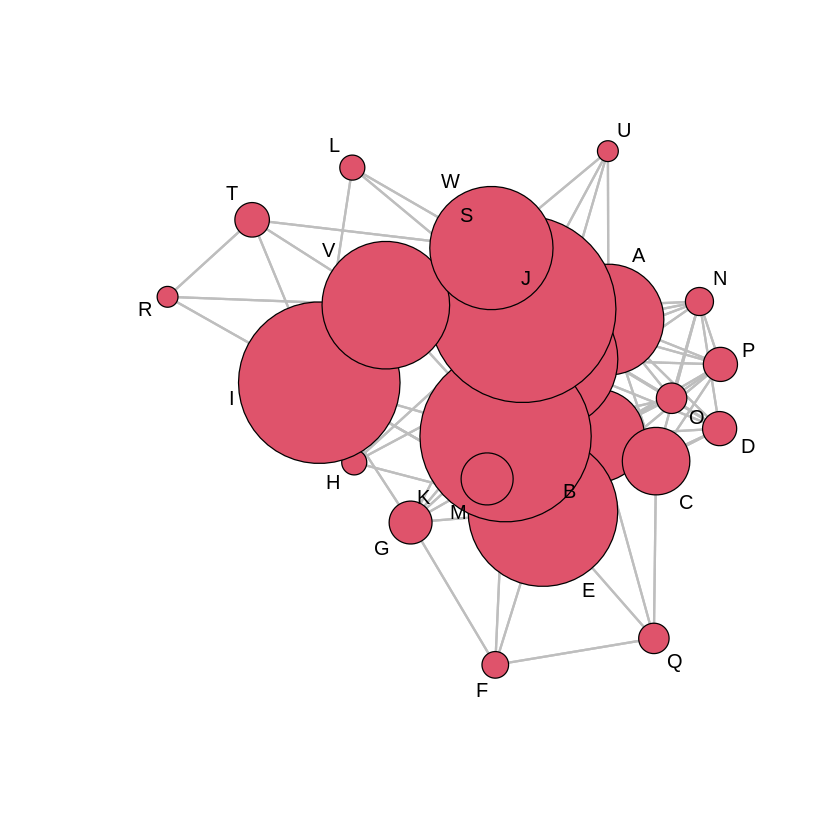

In [62]:
# Aprimorando a representação da rede

gplot(grede,gmode="grede",displaylabels = TRUE,
      edge.col="gray",usearrows=FALSE,vertex.cex=betweenness(grede,gmode="graph")/3+1)

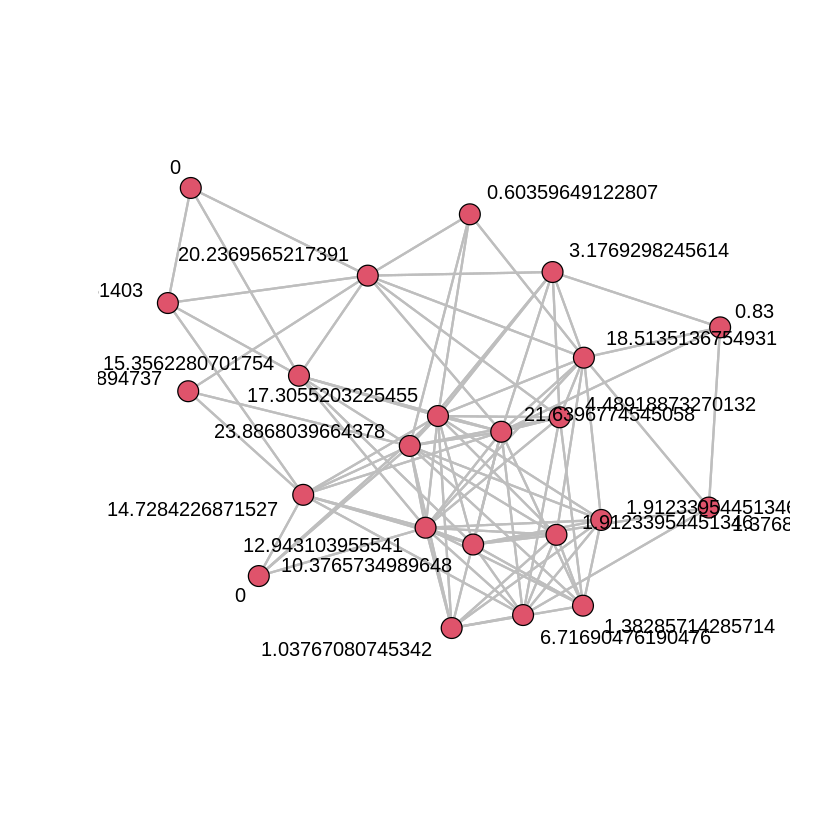

In [63]:
# Aprimorando a representação da rede
gplot(grede,gmode="grede",displaylabels = TRUE,
      edge.col="gray",usearrows=FALSE,label=betweenness(grede,gmode="graph"))

In [64]:
# Comando ?til para explorar redes
# Gera redes aleat?rias
grede2 <- rgraph(10)
grede2

0,0,1,1,1,0,0,0,1,0
1,0,1,0,1,1,0,0,0,0
1,1,0,0,1,1,0,0,1,1
0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,1,0,1
1,0,1,0,1,0,1,1,0,0
0,1,1,0,1,1,0,1,0,1
0,0,0,0,0,0,0,0,0,1
0,0,0,1,1,1,0,1,0,1
1,0,1,0,0,0,1,1,1,0


## Rede Two Mode

In [ ]:
## Rede Two Mode

In [65]:
# Endereço do arquivo na nuvem, para funcionar para todos os colegas
url_dataset <- c("https://raw.githubusercontent.com/ramonferrari/mpgc_ti/main/Rede%20Two%20Mode_Tarefa%20Aulas%205%20e%206.csv")

In [66]:
# Leitura dos dados
compras <- read.table(url_dataset,header=TRUE,sep = ",")

In [67]:
# Dataset lido corretamente?
head(compras)
names(compras)

,Pessoas,iPhone,iPad,Livro.Harry.Potter,jogo.MineCraft,Camisa.do.Corinthians,Bola.de.Futebol,Flauta.Transversal,Lista.Telefônica,Caixa.de.Fósforos,Calculadora,Detergente,Agenda,Cachorro,Pokemon,Álcool.Gel
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,João,1,1,0,1,1,0,1,1,1,1,0,0,0,1,1
2,Maria,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
3,José,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1
4,Paulo,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1
5,Pedro,0,0,1,0,1,1,0,1,1,1,0,0,0,0,1
6,Luisa,0,0,1,0,1,1,0,1,1,1,0,0,1,0,1


[1] "Pessoas"               "iPhone"                "iPad"                 
 [4] "Livro.Harry.Potter"    "jogo.MineCraft"        "Camisa.do.Corinthians"
 [7] "Bola.de.Futebol"       "Flauta.Transversal"    "Lista.Telefônica"     
[10] "Caixa.de.Fósforos"     "Calculadora"           "Detergente"           
[13] "Agenda"                "Cachorro"              "Pokemon"              
[16] "Álcool.Gel"

In [68]:
# Adaptando o data.frame rede para que possa servir para a montagem da rede
gcompras <- compras[,2:16]
rownames(gcompras) <- compras[,1]
head(gcompras)
names(gcompras)

,iPhone,iPad,Livro.Harry.Potter,jogo.MineCraft,Camisa.do.Corinthians,Bola.de.Futebol,Flauta.Transversal,Lista.Telefônica,Caixa.de.Fósforos,Calculadora,Detergente,Agenda,Cachorro,Pokemon,Álcool.Gel
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
João,1,1,0,1,1,0,1,1,1,1,0,0,0,1,1
Maria,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
José,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1
Paulo,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1
Pedro,0,0,1,0,1,1,0,1,1,1,0,0,0,0,1
Luisa,0,0,1,0,1,1,0,1,1,1,0,0,1,0,1


[1] "iPhone"                "iPad"                  "Livro.Harry.Potter"   
 [4] "jogo.MineCraft"        "Camisa.do.Corinthians" "Bola.de.Futebol"      
 [7] "Flauta.Transversal"    "Lista.Telefônica"      "Caixa.de.Fósforos"    
[10] "Calculadora"           "Detergente"            "Agenda"               
[13] "Cachorro"              "Pokemon"               "Álcool.Gel"

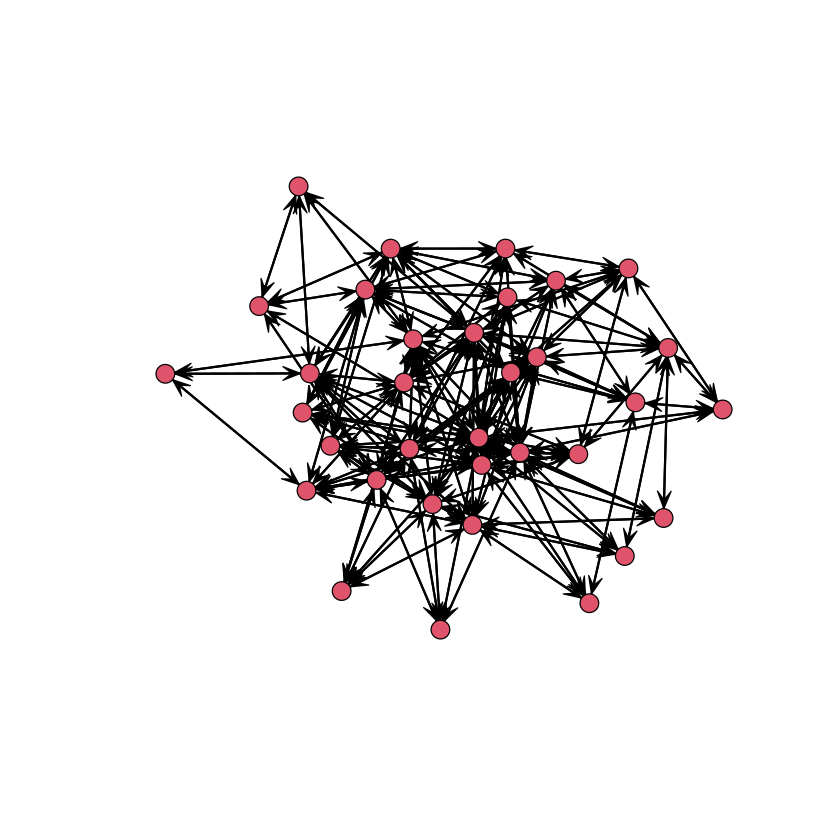

In [69]:
# Construindo a rede a partir da matriz de relações (0 e 1)
gplot(gcompras)


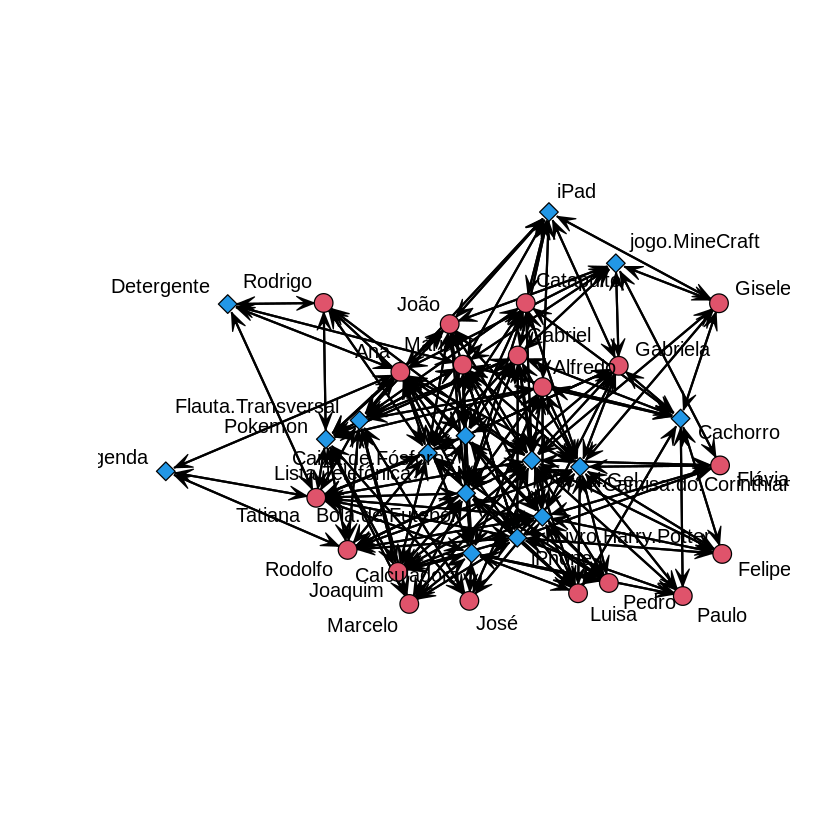

In [70]:
gplot(gcompras,gmode="twomode",displaylabels = TRUE)

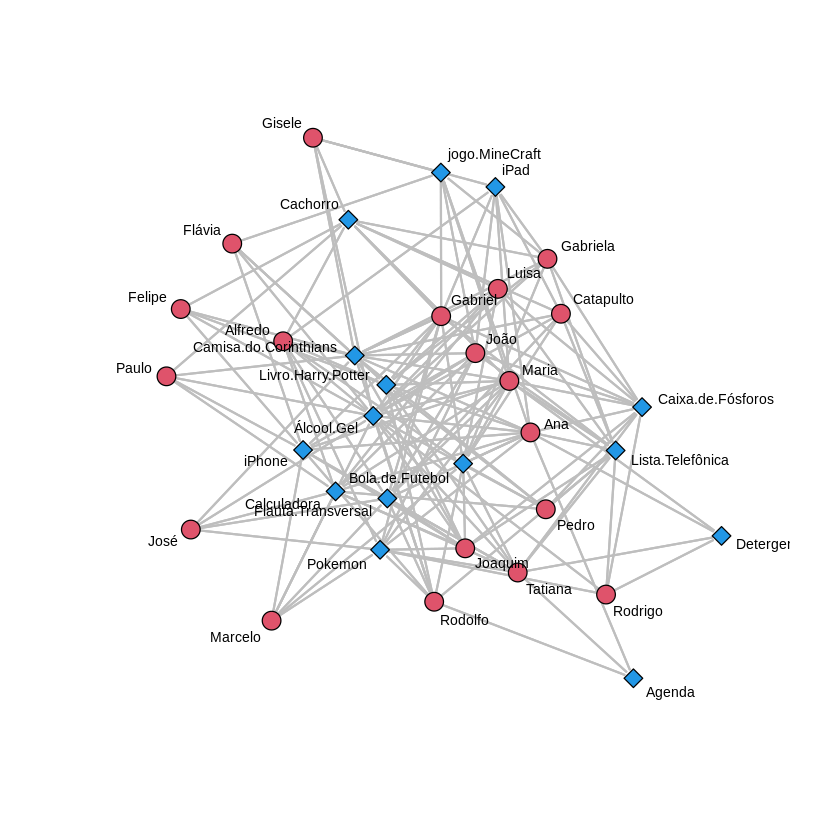

In [71]:
gplot(gcompras,gmode="twomode",displaylabels = TRUE,
      edge.col="gray",label.cex = 0.7,usearrows=FALSE)